# Heart Disease Risk Prediction System - Complete End-to-End Solution
## Student ID: 24RP15116

### Project Overview
This notebook implements a complete machine learning pipeline for predicting heart disease risk across 5 categories:
- **0**: No Disease
- **1**: Very Mild
- **2**: Mild
- **3**: Severe
- **4**: Immediate Danger

### Dataset Information
- **Size**: 5000 patients
- **Features**: 13 clinical features
- **Target**: Multi-class classification (5 classes)


## PART 0: Import All Required Libraries

In [42]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import time

# Models
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Evaluation metrics
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score,
    precision_recall_fscore_support
)

# Model persistence
import joblib
import json
import os

# Set random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print(' All libraries imported successfully!')

 All libraries imported successfully!


## PART 1: Data Loading

In [43]:
# Load the dataset
df = pd.read_csv('heart_disease_dataset_CHUD_S_A.csv')

print('✓ Dataset loaded successfully!')

✓ Dataset loaded successfully!


In [44]:
# Display length of total samples
total_samples = len(df)
print(f'Total number of samples: {total_samples:,}')

Total number of samples: 5,000


In [45]:
# Display length of total features (excluding target)
total_features = df.shape[1] - 1  # Subtract 1 for target column
print(f'Total number of features: {total_features}')

Total number of features: 13


In [46]:
# Display first 5 dataframe records
print('\nFirst 5 records of the dataset:')
print('=' * 100)
df.head(5)


First 5 records of the dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
0,38.871687,Male,Typical Angina,100.490248,163.166661,NaN,LV hypertrophy,183.658119,No,0.114644,Upsloping,0.0,Normal,no disease
1,60.625755,Male,Asymptomatic,NaN,338.711395,True,LV hypertrophy,141.161921,NaN,2.361526,Downsloping,2.0,NaN,severe
2,64.306898,Male,NaN,146.355656,337.004035,True,LV hypertrophy,NaN,Yes,2.660477,Downsloping,2.0,Reversible defect,severe
3,57.457313,Female,Non-Anginal Pain,NaN,260.116075,True,NaN,150.353969,Yes,1.145959,Flat,1.0,Reversible defect,mild
4,53.394739,Male,Non-Anginal Pain,129.763455,224.948879,False,LV hypertrophy,147.834030,Yes,NaN,Flat,NaN,Reversible defect,mild


In [47]:
# One line of code to display total sum of missing values for all features
print(f'Total missing values in dataset: {df.isnull().sum().sum():,}')

Total missing values in dataset: 7,660


## PART 2: EDA (Exploratory Data Analysis)
### BASIC STATISTICS AND CALCULATIONS

In [48]:
# Display shape for only instances (rows)
num_instances = df.shape[0]
print(f'Number of instances (samples): {num_instances:,}')

Number of instances (samples): 5,000


In [49]:
# Display shape for only features (columns excluding target)
num_features = df.shape[1] - 1
print(f'Number of features: {num_features}')

Number of features: 13


In [50]:
# Display datatype for only features (exclude target column)
feature_columns = [col for col in df.columns if col != 'heart_disease']
print('\nDatatype of features:')
print('=' * 60)
for col in feature_columns:
    print(f'{col:<15}: {df[col].dtype}')


Datatype of features:
age            : float64
sex            : object
cp             : object
trestbps       : float64
chol           : float64
fbs            : object
restecg        : object
thalach        : float64
exang          : object
oldpeak        : float64
slope          : object
ca             : float64
thal           : object


In [51]:
# Display dataset detailed information
print('\n' + '=' * 100)
print('DATASET DETAILED INFORMATION')
print('=' * 100)
df.info()


DATASET DETAILED INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            4411 non-null   float64
 1   sex            4418 non-null   object 
 2   cp             4409 non-null   object 
 3   trestbps       4399 non-null   float64
 4   chol           4425 non-null   float64
 5   fbs            4421 non-null   object 
 6   restecg        4417 non-null   object 
 7   thalach        4416 non-null   float64
 8   exang          4405 non-null   object 
 9   oldpeak        4407 non-null   float64
 10  slope          4402 non-null   object 
 11  ca             4411 non-null   float64
 12  thal           4399 non-null   object 
 13  heart_disease  5000 non-null   object 
dtypes: float64(6), object(8)
memory usage: 547.0+ KB


In [52]:
# Show descriptive statistics for numerical features
print('\n' + '=' * 100)
print('DESCRIPTIVE STATISTICS FOR NUMERICAL FEATURES')
print('=' * 100)
df.describe()


DESCRIPTIVE STATISTICS FOR NUMERICAL FEATURES


,age,trestbps,chol,thalach,oldpeak,ca
count,4411.000000,4399.000000,4425.000000,4416.000000,4407.000000,4411.000000
mean,54.829901,133.019682,262.883223,150.289463,1.778127,1.378372
std,10.855032,19.913154,80.613567,22.141853,1.581597,1.022590
min,29.000000,94.000000,126.000000,101.383435,0.000000,0.000000
25%,46.027138,116.479869,188.967414,131.642083,0.485799,1.000000
50%,54.822873,134.500404,259.801646,149.953070,1.191017,1.000000
75%,63.539473,148.299363,327.875962,169.124221,2.626216,2.000000
max,77.000000,176.782096,423.482009,195.551682,5.165494,3.000000


### Target Variable Encoding

In [53]:
# Map target labels to numeric values
target_mapping = {
    'no disease': 0,
    'very mild': 1,
    'mild': 2,
    'severe': 3,
    'immediate danger': 4
}

# Create target column
df['target'] = df['heart_disease'].str.lower().map(target_mapping)

# Create y variable for easy access
y = df['target'].copy()

# Define class labels
target_labels = ['No Disease', 'Very Mild', 'Mild', 'Severe', 'Immediate Danger']

print(' Target variable encoded successfully!')
print(f'  Unique values: {sorted(y.dropna().unique())}')

 Target variable encoded successfully!
  Unique values: [0, 1, 2, 3, 4]


In [54]:
# Show how many samples belong to each heart disease class
print('\n' + '=' * 80)
print('SAMPLES PER HEART DISEASE CLASS')
print('=' * 80)
class_counts = y.value_counts().sort_index()
print('\nClass Distribution:')
for i, label in enumerate(target_labels):
    count = class_counts.get(i, 0)
    print(f'  {i} - {label:<20}: {count:4d} samples')


SAMPLES PER HEART DISEASE CLASS

Class Distribution:
  0 - No Disease          : 1030 samples
  1 - Very Mild           :  974 samples
  2 - Mild                : 1028 samples
  3 - Severe              :  974 samples
  4 - Immediate Danger    :  994 samples


In [55]:
# Present percentage contribution of each class
print('\n' + '=' * 80)
print('PERCENTAGE CONTRIBUTION OF EACH CLASS')
print('=' * 80)
class_percentages = (y.value_counts().sort_index() / len(y)) * 100
print('\nPercentage Distribution:')
for i, label in enumerate(target_labels):
    pct = class_percentages.get(i, 0)
    print(f'  {i} - {label:<20}: {pct:5.2f}%')


PERCENTAGE CONTRIBUTION OF EACH CLASS

Percentage Distribution:
  0 - No Disease          : 20.60%
  1 - Very Mild           : 19.48%
  2 - Mild                : 20.56%
  3 - Severe              : 19.48%
  4 - Immediate Danger    : 19.88%


In [56]:
# Analyze dataset balance
print('\n' + '=' * 80)
print('DATASET BALANCE ANALYSIS')
print('=' * 80)
class_counts = y.value_counts().sort_index()
largest_class = class_counts.max()
smallest_class = class_counts.min()
imbalance_ratio = largest_class / smallest_class

print(f'\nLargest class count: {largest_class}')
print(f'Smallest class count: {smallest_class}')
print(f'Imbalance ratio: {imbalance_ratio:.2f}')

if imbalance_ratio < 1.5:
    print('\n Dataset is BALANCED (ratio < 1.5)')
elif imbalance_ratio < 3:
    print('\n Dataset is SLIGHTLY IMBALANCED (1.5 ≤ ratio < 3)')
else:
    print('\n Dataset is HIGHLY IMBALANCED (ratio ≥ 3)')


DATASET BALANCE ANALYSIS

Largest class count: 1030
Smallest class count: 974
Imbalance ratio: 1.06

 Dataset is BALANCED (ratio < 1.5)


### VISUALIZATION

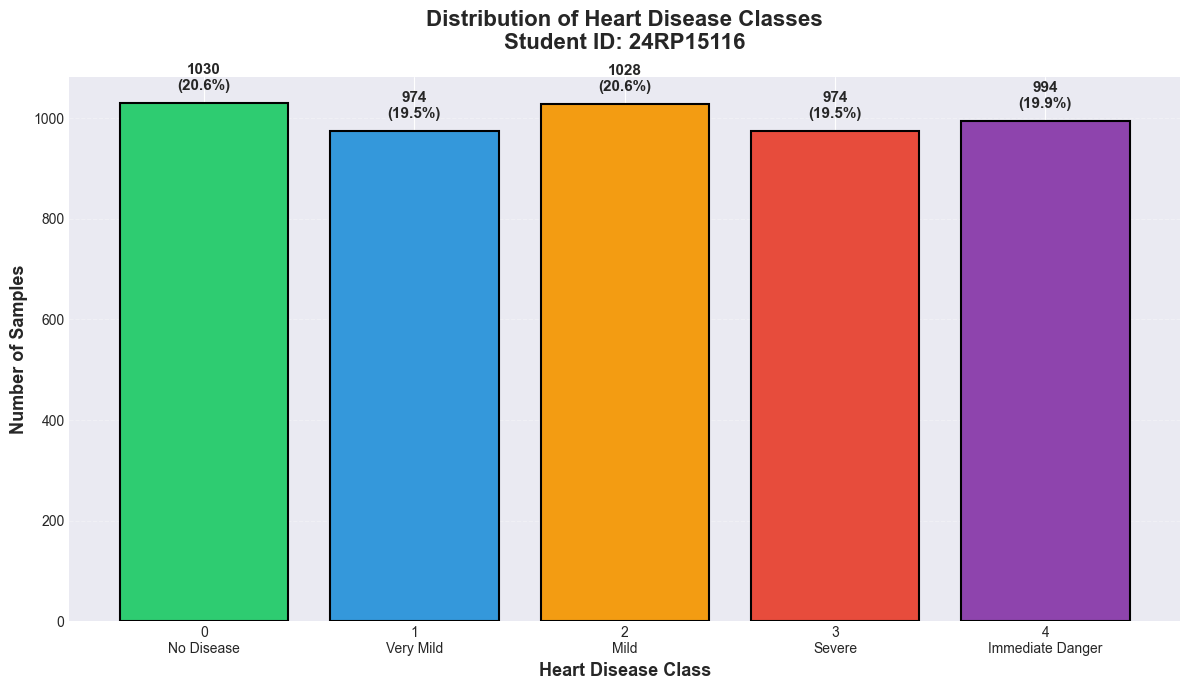

 Bar plot saved as: heart_disease_distribution_barplot.png


In [57]:
# Create bar plot showing distribution of all five heart disease classes
plt.figure(figsize=(12, 7))

class_counts = y.value_counts().sort_index()
class_percentages = (class_counts / len(y)) * 100

colors = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c', '#8e44ad']
bars = plt.bar(range(len(target_labels)), class_counts, color=colors, edgecolor='black', linewidth=1.5)

# Add counts and percentages on each bar
for i, (bar, count, pct) in enumerate(zip(bars, class_counts, class_percentages)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 20,
             f'{count}\n({pct:.1f}%)',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.xlabel('Heart Disease Class', fontsize=13, fontweight='bold')
plt.ylabel('Number of Samples', fontsize=13, fontweight='bold')
plt.title('Distribution of Heart Disease Classes\nStudent ID: 24RP15116', 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(range(len(target_labels)), [f'{i}\n{label}' for i, label in enumerate(target_labels)],
          rotation=0, fontsize=10)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('heart_disease_distribution_barplot.png', dpi=300, bbox_inches='tight')
plt.show()

print(' Bar plot saved as: heart_disease_distribution_barplot.png')

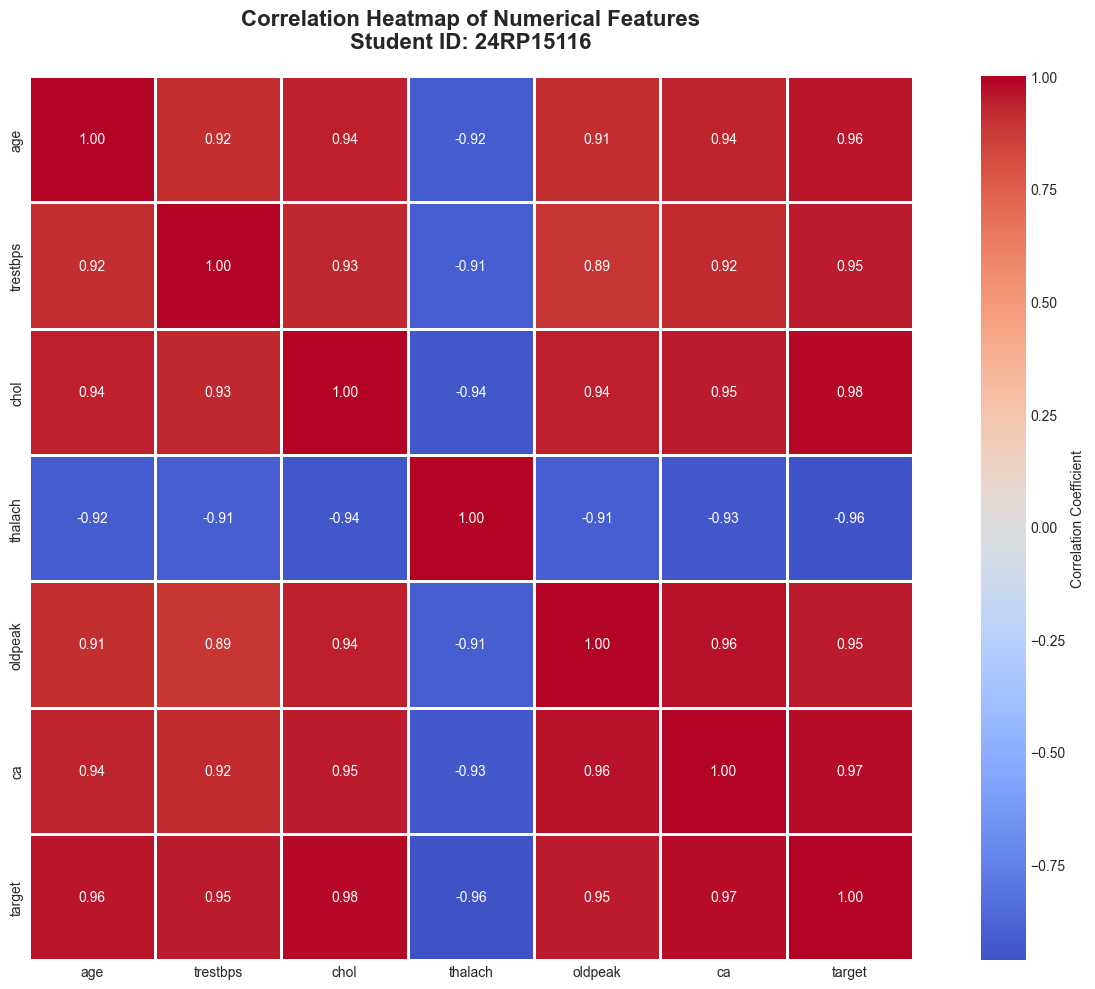

 Correlation heatmap saved as: heart_disease_correlation_heatmap.png


In [58]:
# Generate correlation heatmap for numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Include target in correlation
if 'target' not in numerical_cols:
    numerical_cols.append('target')

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Heatmap of Numerical Features\nStudent ID: 24RP15116',
         fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('heart_disease_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print(' Correlation heatmap saved as: heart_disease_correlation_heatmap.png')

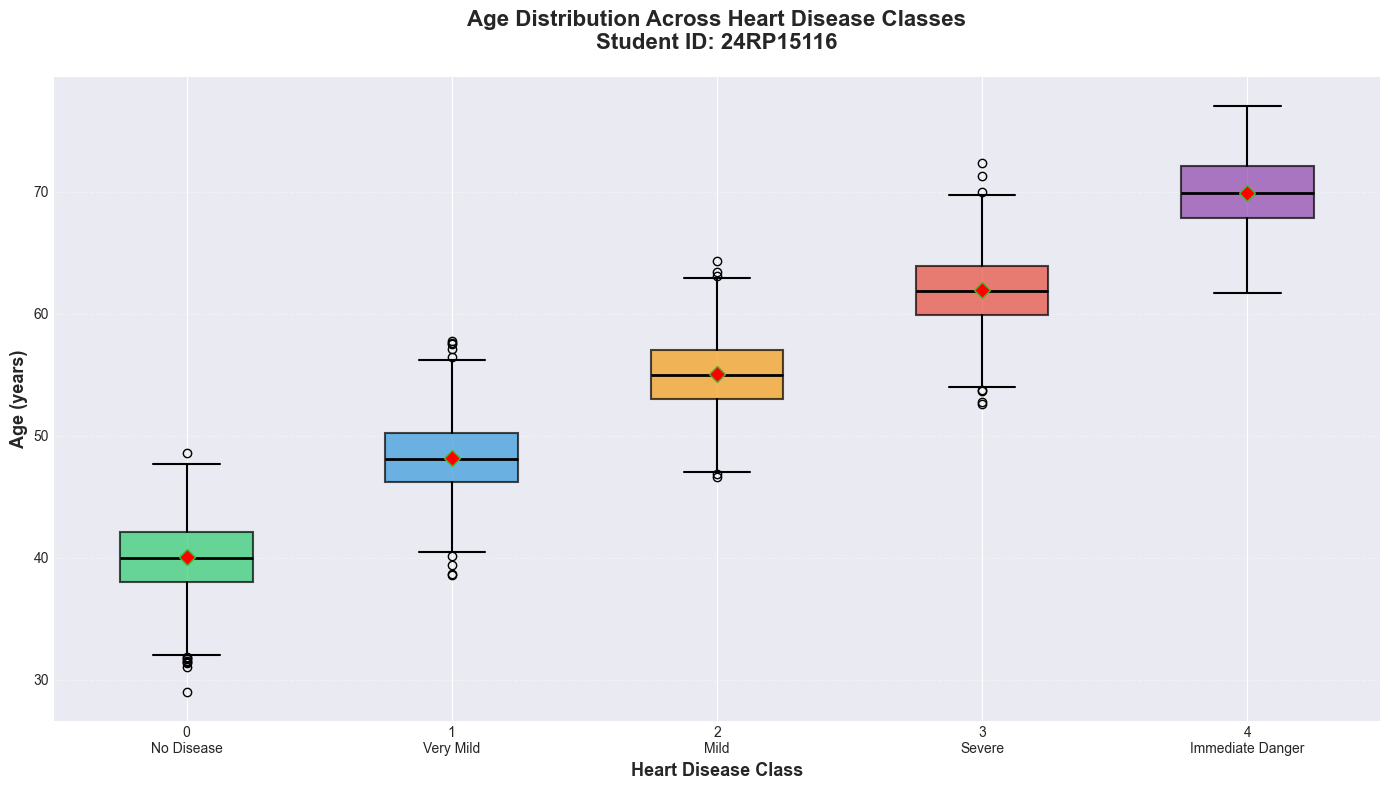

 Age box plot saved as: heart_disease_age_boxplot.png


In [59]:
# Box plot showing age distribution across five heart disease classes
plt.figure(figsize=(14, 8))

age_data = [df[df['target'] == i]['age'].dropna() for i in range(5)]
colors = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c', '#8e44ad']

bp = plt.boxplot(age_data,
                labels=[f'{i}\n{label}' for i, label in enumerate(target_labels)],
                patch_artist=True,
                showmeans=True,
                meanprops=dict(marker='D', markerfacecolor='red', markersize=8),
                medianprops=dict(color='black', linewidth=2),
                boxprops=dict(linewidth=1.5),
                whiskerprops=dict(linewidth=1.5),
                capprops=dict(linewidth=1.5))

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

plt.xlabel('Heart Disease Class', fontsize=13, fontweight='bold')
plt.ylabel('Age (years)', fontsize=13, fontweight='bold')
plt.title('Age Distribution Across Heart Disease Classes\nStudent ID: 24RP15116',
         fontsize=16, fontweight='bold', pad=20)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('heart_disease_age_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

print(' Age box plot saved as: heart_disease_age_boxplot.png')

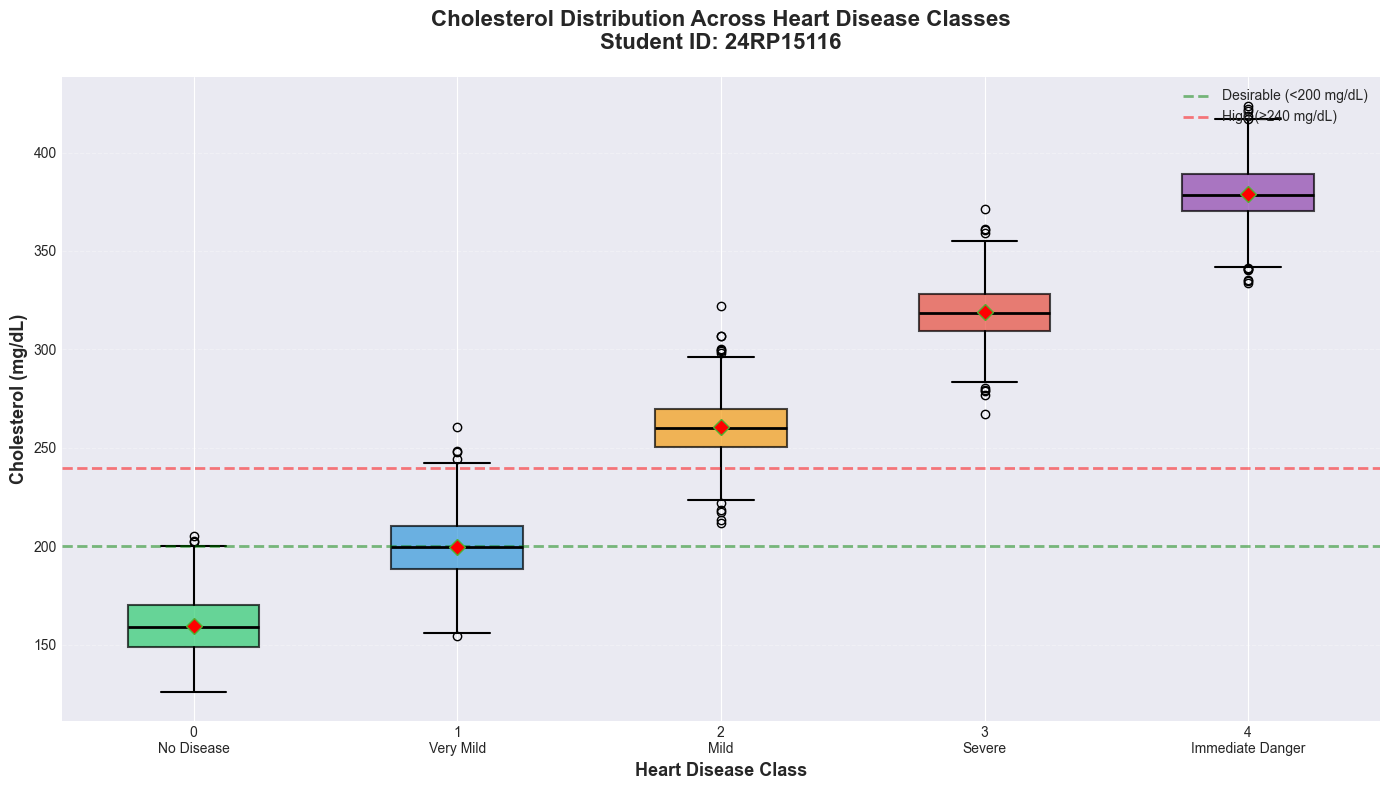

 Cholesterol box plot saved as: heart_disease_cholesterol_boxplot.png


In [60]:
# Box plot comparing cholesterol levels across five heart disease classes
plt.figure(figsize=(14, 8))

chol_data = [df[df['target'] == i]['chol'].dropna() for i in range(5)]
colors = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c', '#8e44ad']

bp = plt.boxplot(chol_data,
                labels=[f'{i}\n{label}' for i, label in enumerate(target_labels)],
                patch_artist=True,
                showmeans=True,
                meanprops=dict(marker='D', markerfacecolor='red', markersize=8),
                medianprops=dict(color='black', linewidth=2),
                boxprops=dict(linewidth=1.5),
                whiskerprops=dict(linewidth=1.5),
                capprops=dict(linewidth=1.5))

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Add reference lines
plt.axhline(y=200, color='green', linestyle='--', linewidth=2, alpha=0.5, label='Desirable (<200 mg/dL)')
plt.axhline(y=240, color='red', linestyle='--', linewidth=2, alpha=0.5, label='High (≥240 mg/dL)')

plt.xlabel('Heart Disease Class', fontsize=13, fontweight='bold')
plt.ylabel('Cholesterol (mg/dL)', fontsize=13, fontweight='bold')
plt.title('Cholesterol Distribution Across Heart Disease Classes\nStudent ID: 24RP15116',
         fontsize=16, fontweight='bold', pad=20)
plt.legend(loc='upper right', fontsize=10)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('heart_disease_cholesterol_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

print(' Cholesterol box plot saved as: heart_disease_cholesterol_boxplot.png')

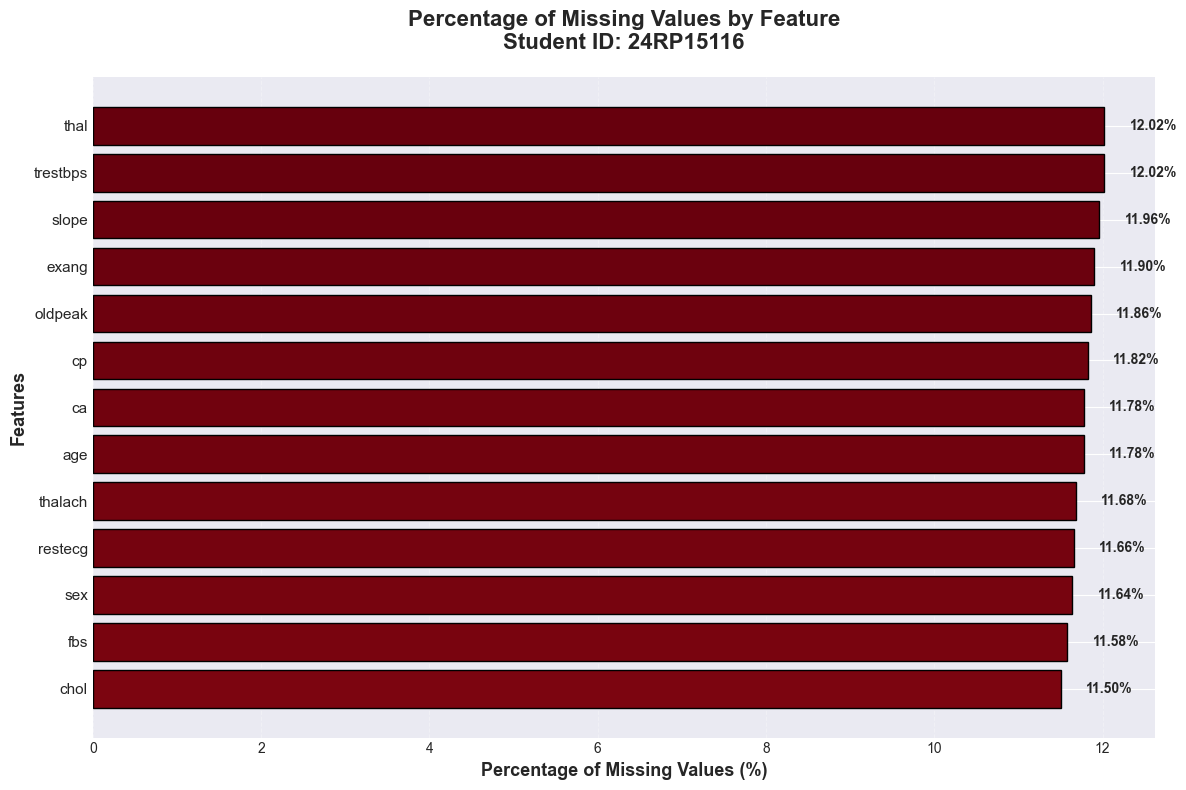


 Missing values chart saved as: heart_disease_missing_values_analysis.png
  Total features with missing values: 13


In [61]:
# Horizontal bar chart showing percentage of missing values
missing_counts = df.isnull().sum()
missing_percentages = (missing_counts / len(df)) * 100
missing_data = missing_percentages[missing_percentages > 0].sort_values(ascending=True)

if len(missing_data) == 0:
    print('\n' + '='*80)
    print(' NO MISSING VALUES FOUND IN THE DATASET')
    print('='*80)
else:
    plt.figure(figsize=(12, 8))
    colors_grad = plt.cm.Reds(missing_data / missing_data.max())
    bars = plt.barh(range(len(missing_data)), missing_data, color=colors_grad, edgecolor='black')
    
    # Add percentage labels
    for i, (bar, pct) in enumerate(zip(bars, missing_data)):
        plt.text(pct + 0.3, i, f'{pct:.2f}%', 
                va='center', fontsize=10, fontweight='bold')
    
    plt.yticks(range(len(missing_data)), missing_data.index, fontsize=11)
    plt.xlabel('Percentage of Missing Values (%)', fontsize=13, fontweight='bold')
    plt.ylabel('Features', fontsize=13, fontweight='bold')
    plt.title('Percentage of Missing Values by Feature\nStudent ID: 24RP15116',
             fontsize=16, fontweight='bold', pad=20)
    plt.grid(axis='x', alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.savefig('heart_disease_missing_values_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f'\n Missing values chart saved as: heart_disease_missing_values_analysis.png')
    print(f'  Total features with missing values: {len(missing_data)}')

## PART 3: DATA PREPROCESSING

### Train-Test Split

In [62]:
# (a) Separate features from target and perform 80/20 train-test split
# with stratification to maintain class balance

# Separate features (X) and target (y)
X = df.drop(columns=['heart_disease', 'target'])
# y was already created earlier

# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(' Train-test split completed successfully!')
print(f'  Train-test ratio: 80/20')
print(f'  Random state: 42')
print(f'  Stratification: Applied')

 Train-test split completed successfully!
  Train-test ratio: 80/20
  Random state: 42
  Stratification: Applied


In [63]:
# (b) Display number of training and testing samples with percentages

total_samples = len(X)
train_samples = len(X_train)
test_samples = len(X_test)

train_pct = (train_samples / total_samples) * 100
test_pct = (test_samples / total_samples) * 100

print('\n' + '='*80)
print('TRAIN-TEST SPLIT SUMMARY')
print('='*80)
print(f'\nTotal samples:     {total_samples:,}')
print(f'\nTraining samples:  {train_samples:,} ({train_pct:.1f}%)')
print(f'Testing samples:   {test_samples:,} ({test_pct:.1f}%)')
print(f'\nFeatures (X):      {X_train.shape[1]}')
print(f'Target (y):        1 (multi-class with 5 classes)')


TRAIN-TEST SPLIT SUMMARY

Total samples:     5,000

Training samples:  4,000 (80.0%)
Testing samples:   1,000 (20.0%)

Features (X):      13
Target (y):        1 (multi-class with 5 classes)


In [64]:
# (c) Verify stratification by comparing class distributions

# Calculate class distributions
original_dist = (y.value_counts(normalize=True).sort_index() * 100)
train_dist = (y_train.value_counts(normalize=True).sort_index() * 100)
test_dist = (y_test.value_counts(normalize=True).sort_index() * 100)

# Create comparison dataframe
stratification_df = pd.DataFrame({
    'Class': [f'{i} - {label}' for i, label in enumerate(target_labels)],
    'Original (%)': [original_dist.get(i, 0) for i in range(5)],
    'Train (%)': [train_dist.get(i, 0) for i in range(5)],
    'Test (%)': [test_dist.get(i, 0) for i in range(5)]
})

print('\n' + '='*80)
print('STRATIFICATION VERIFICATION')
print('='*80)
print('\nClass distribution comparison:')
print(stratification_df.to_string(index=False))
print('\n Stratification successful - distributions are consistent across splits')


STRATIFICATION VERIFICATION

Class distribution comparison:
               Class  Original (%)  Train (%)  Test (%)
      0 - No Disease         20.60     20.600      20.6
       1 - Very Mild         19.48     19.475      19.5
            2 - Mild         20.56     20.575      20.5
          3 - Severe         19.48     19.475      19.5
4 - Immediate Danger         19.88     19.875      19.9

 Stratification successful - distributions are consistent across splits


### Preprocessing Pipelines

In [65]:
# (a) Identify numerical features, (b) display count, (c) create preprocessing pipeline

# Identify numerical features
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()

print('='*80)
print('NUMERICAL FEATURES PREPROCESSING')
print('='*80)
print(f'\n(a) Numerical features identified:')
for i, feat in enumerate(numerical_features, 1):
    print(f'    {i}. {feat}')

print(f'\n(b) Total numerical features: {len(numerical_features)}')

# Check if median or mean is better (check for outliers)
print(f'\n(c) Creating preprocessing pipeline...')
print('    - Imputation strategy: Median (robust to outliers)')
print('    - Scaling method: StandardScaler')

# Create numerical preprocessing pipeline
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

print('\n Numerical preprocessing pipeline created successfully!')

NUMERICAL FEATURES PREPROCESSING

(a) Numerical features identified:
    1. age
    2. trestbps
    3. chol
    4. thalach
    5. oldpeak
    6. ca

(b) Total numerical features: 6

(c) Creating preprocessing pipeline...
    - Imputation strategy: Median (robust to outliers)
    - Scaling method: StandardScaler

 Numerical preprocessing pipeline created successfully!


In [66]:
# (a) Identify categorical features, (b) display count, (c) create preprocessing pipeline

# Identify categorical features (object and boolean types)
categorical_features = X.select_dtypes(include=['object', 'bool']).columns.tolist()

print('\n' + '='*80)
print('CATEGORICAL FEATURES PREPROCESSING')
print('='*80)
print(f'\n(a) Categorical features identified:')
for i, feat in enumerate(categorical_features, 1):
    print(f'    {i}. {feat}')

print(f'\n(b) Total categorical features: {len(categorical_features)}')

print(f'\n(c) Creating preprocessing pipeline...')
print('    - Imputation strategy: Most frequent (mode)')
print('    - Encoding method: OneHotEncoder with unknown category handling')

# Create categorical preprocessing pipeline
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

print('\n Categorical preprocessing pipeline created successfully!')


CATEGORICAL FEATURES PREPROCESSING

(a) Categorical features identified:
    1. sex
    2. cp
    3. fbs
    4. restecg
    5. exang
    6. slope
    7. thal

(b) Total categorical features: 7

(c) Creating preprocessing pipeline...
    - Imputation strategy: Most frequent (mode)
    - Encoding method: OneHotEncoder with unknown category handling

 Categorical preprocessing pipeline created successfully!


In [67]:
# Combine numerical and categorical pipelines using ColumnTransformer
# and apply to training and testing data

print('\n' + '='*80)
print('COMBINING PREPROCESSING PIPELINES')
print('='*80)

# Create ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ],
    remainder='drop'
)

print('\n ColumnTransformer created successfully!')
print('  - Numerical pipeline: Applied to numerical features')
print('  - Categorical pipeline: Applied to categorical features')

# Fit and transform training data
print('\nTransforming training data...')
X_train_transformed = preprocessor.fit_transform(X_train)
print(' Training data fitted and transformed')

# Transform testing data (only transform, do not fit)
print('\nTransforming testing data...')
X_test_transformed = preprocessor.transform(X_test)
print(' Testing data transformed')

# Display transformed shapes
print('\n' + '='*80)
print('TRANSFORMED DATA SHAPES')
print('='*80)
print(f'\n(a) Training set shape:   {X_train_transformed.shape}')
print(f'    - Samples: {X_train_transformed.shape[0]:,}')
print(f'    - Features after transformation: {X_train_transformed.shape[1]}')

print(f'\n(b) Testing set shape:    {X_test_transformed.shape}')
print(f'    - Samples: {X_test_transformed.shape[0]:,}')
print(f'    - Features after transformation: {X_test_transformed.shape[1]}')

print('\n Preprocessing pipeline working correctly!')


COMBINING PREPROCESSING PIPELINES

 ColumnTransformer created successfully!
  - Numerical pipeline: Applied to numerical features
  - Categorical pipeline: Applied to categorical features

Transforming training data...
 Training data fitted and transformed

Transforming testing data...
 Testing data transformed

TRANSFORMED DATA SHAPES

(a) Training set shape:   (4000, 25)
    - Samples: 4,000
    - Features after transformation: 25

(b) Testing set shape:    (1000, 25)
    - Samples: 1,000
    - Features after transformation: 25

 Preprocessing pipeline working correctly!


### Final Verification

In [68]:
# Final verification of preprocessing

print('='*80)
print('PREPROCESSING VERIFICATION')
print('='*80)

# (a) Check for missing values in training data
train_missing = np.isnan(X_train_transformed).sum()
print(f'\n(a) Missing values in transformed training data: {train_missing}')
if train_missing == 0:
    print('     PASS: No missing values in training data')
else:
    print('     FAIL: Missing values detected')

# (b) Check for missing values in testing data
test_missing = np.isnan(X_test_transformed).sum()
print(f'\n(b) Missing values in transformed testing data: {test_missing}')
if test_missing == 0:
    print('     PASS: No missing values in testing data')
else:
    print('     FAIL: Missing values detected')

# (c) Verify all features are numeric
all_numeric = np.issubdtype(X_train_transformed.dtype, np.number)
print(f'\n(c) All transformed features are numeric: {all_numeric}')
if all_numeric:
    print('     PASS: All features are numeric')
    print(f'    Data type: {X_train_transformed.dtype}')
else:
    print('     FAIL: Non-numeric features detected')

print('\n' + '='*80)
print(' ALL PREPROCESSING CHECKS PASSED')
print('='*80)
print('\nData is ready for model training!')

PREPROCESSING VERIFICATION

(a) Missing values in transformed training data: 0
     PASS: No missing values in training data

(b) Missing values in transformed testing data: 0
     PASS: No missing values in testing data

(c) All transformed features are numeric: True
     PASS: All features are numeric
    Data type: float64

 ALL PREPROCESSING CHECKS PASSED

Data is ready for model training!


## PART 4: MODEL TRAINING & EVALUATION

### Train Multiple Models with Hyperparameter Tuning

In [69]:
# Train multiple models (MLP, Random Forest, SVM, KNN, Gradient Boosting)
# with hyperparameter tuning using GridSearchCV

print('='*80)
print('MODEL TRAINING WITH HYPERPARAMETER TUNING')
print('='*80)

# Define models with their hyperparameter grids
models_config = {
    'MLP': {
        'model': MLPClassifier(random_state=RANDOM_STATE, max_iter=1000),
        'params': {
            'classifier__hidden_layer_sizes': [(100,), (100, 50)],
            'classifier__activation': ['relu', 'tanh'],
            'classifier__alpha': [0.0001, 0.001]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [10, 20, None],
            'classifier__min_samples_split': [2, 5]
        }
    },
    'SVM': {
        'model': SVC(random_state=RANDOM_STATE, probability=True),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['rbf', 'linear'],
            'classifier__gamma': ['scale', 'auto']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'classifier__n_neighbors': [3, 5, 7],
            'classifier__weights': ['uniform', 'distance'],
            'classifier__metric': ['euclidean', 'manhattan']
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=RANDOM_STATE),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__learning_rate': [0.01, 0.1],
            'classifier__max_depth': [3, 5]
        }
    }
}

# Storage for results
results = []
best_models = {}
best_params_dict = {}

print('\nStarting model training and tuning...\n')

MODEL TRAINING WITH HYPERPARAMETER TUNING

Starting model training and tuning...



In [70]:
# (a)(b)(c)(d) Train each model with GridSearchCV and record results

for model_name, config in models_config.items():
    print(f'\n{"="*80}')
    print(f'Training: {model_name}')
    print(f'{"="*80}')
    
    # (a) Build full pipeline (preprocessor + classifier)
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', config['model'])
    ])
    
    # (b) GridSearchCV with hyperparameter tuning
    start_time = time.time()
    
    grid_search = GridSearchCV(
        pipeline,
        param_grid=config['params'],
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE),
        scoring='accuracy',
        n_jobs=-1,
        verbose=0
    )
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    
    training_time = time.time() - start_time
    
    # (c) Record best parameters and CV accuracy
    best_params = grid_search.best_params_
    best_cv_accuracy = grid_search.best_score_
    
    # Get best model
    best_model = grid_search.best_estimator_
    
    # Calculate train and test accuracy
    train_accuracy = best_model.score(X_train, y_train)
    test_accuracy = best_model.score(X_test, y_test)
    
    # Store the best model
    best_models[model_name] = best_model
    best_params_dict[model_name] = best_params
    
    # Display results
    print(f'\nBest Parameters:')
    for param, value in best_params.items():
        print(f'  {param}: {value}')
    
    print(f'\nPerformance Metrics:')
    print(f'  Best CV Accuracy:  {best_cv_accuracy:.4f}')
    print(f'  Train Accuracy:    {train_accuracy:.4f}')
    print(f'  Test Accuracy:     {test_accuracy:.4f}')
    print(f'  Training Time:     {training_time:.2f} seconds')
    
    # (d) Store results for comparison
    results.append({
        'Model': model_name,
        'Best CV Accuracy': best_cv_accuracy,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Training Time (s)': training_time
    })
    
    print(f'\n {model_name} training completed!')

print(f'\n{"="*80}')
print(' ALL MODELS TRAINED SUCCESSFULLY')
print(f'{"="*80}')


Training: MLP

Best Parameters:
  classifier__activation: relu
  classifier__alpha: 0.0001
  classifier__hidden_layer_sizes: (100,)

Performance Metrics:
  Best CV Accuracy:  0.9977
  Train Accuracy:    0.9998
  Test Accuracy:     0.9990
  Training Time:     66.04 seconds

 MLP training completed!

Training: Random Forest

Best Parameters:
  classifier__max_depth: 20
  classifier__min_samples_split: 2
  classifier__n_estimators: 100

Performance Metrics:
  Best CV Accuracy:  0.9998
  Train Accuracy:    1.0000
  Test Accuracy:     1.0000
  Training Time:     13.47 seconds

 Random Forest training completed!

Training: SVM

Best Parameters:
  classifier__C: 10
  classifier__gamma: auto
  classifier__kernel: rbf

Performance Metrics:
  Best CV Accuracy:  0.9983
  Train Accuracy:    0.9990
  Test Accuracy:     0.9990
  Training Time:     4.55 seconds

 SVM training completed!

Training: KNN

Best Parameters:
  classifier__metric: manhattan
  classifier__n_neighbors: 7
  classifier__weight

### Model Comparison & Selection

In [71]:
# (a)(b)(c)(d) Create comparison table with overfitting analysis

print('\n' + '='*80)
print('MODEL COMPARISON TABLE')
print('='*80)

# Create dataframe from results
comparison_df = pd.DataFrame(results)

# (a) Calculate Overfitting Gap
comparison_df['Overfitting Gap'] = comparison_df['Train Accuracy'] - comparison_df['Test Accuracy']

# (b) Define Status based on overfitting gap
def classify_fit(gap):
    if gap < 0.02:
        return 'Best Fit'
    elif gap < 0.05:
        return 'Good Fit'
    elif gap < 0.10:
        return 'Slight Overfit'
    else:
        return 'Overfit'

comparison_df['Status'] = comparison_df['Overfitting Gap'].apply(classify_fit)

# (c) Sort by test accuracy (descending)
comparison_df = comparison_df.sort_values('Test Accuracy', ascending=False).reset_index(drop=True)

# Display the table with all 6 required columns
display_df = comparison_df[[
    'Model', 
    'Best CV Accuracy', 
    'Train Accuracy', 
    'Test Accuracy', 
    'Overfitting Gap', 
    'Status'
]]

print('\n' + display_df.to_string(index=False))

# (d) Select and display best model
best_model_name = comparison_df.iloc[0]['Model']
best_test_accuracy = comparison_df.iloc[0]['Test Accuracy']

print('\n' + '='*80)
print('BEST MODEL SELECTION')
print('='*80)
print(f'\n Best Performing Model: {best_model_name}')
print(f'   Test Accuracy: {best_test_accuracy:.4f} ({best_test_accuracy*100:.2f}%)')
print(f'   Status: {comparison_df.iloc[0]["Status"]}')
print('\n Best model selected successfully!')


MODEL COMPARISON TABLE

            Model  Best CV Accuracy  Train Accuracy  Test Accuracy  Overfitting Gap   Status
    Random Forest           0.99975         1.00000          1.000          0.00000 Best Fit
              MLP           0.99775         0.99975          0.999          0.00075 Best Fit
              SVM           0.99825         0.99900          0.999          0.00000 Best Fit
              KNN           0.99525         1.00000          0.999          0.00100 Best Fit
Gradient Boosting           0.99950         1.00000          0.998          0.00200 Best Fit

BEST MODEL SELECTION

 Best Performing Model: Random Forest
   Test Accuracy: 1.0000 (100.00%)
   Status: Best Fit

 Best model selected successfully!


### Detailed Evaluation of Best Performed Model

In [72]:
# (a) Complete classification report for best model

print('\n' + '='*80)
print(f'DETAILED CLASSIFICATION REPORT - {best_model_name}')
print('='*80)

# Get the best model
best_model = best_models[best_model_name]

# Make predictions
y_pred = best_model.predict(X_test)

# Generate classification report
report = classification_report(
    y_test, 
    y_pred, 
    target_names=target_labels,
    digits=4
)

print('\n' + report)
print('='*80)


DETAILED CLASSIFICATION REPORT - Random Forest

                  precision    recall  f1-score   support

      No Disease     1.0000    1.0000    1.0000       206
       Very Mild     1.0000    1.0000    1.0000       195
            Mild     1.0000    1.0000    1.0000       205
          Severe     1.0000    1.0000    1.0000       195
Immediate Danger     1.0000    1.0000    1.0000       199

        accuracy                         1.0000      1000
       macro avg     1.0000    1.0000    1.0000      1000
    weighted avg     1.0000    1.0000    1.0000      1000




CONFUSION MATRIX VISUALIZATION


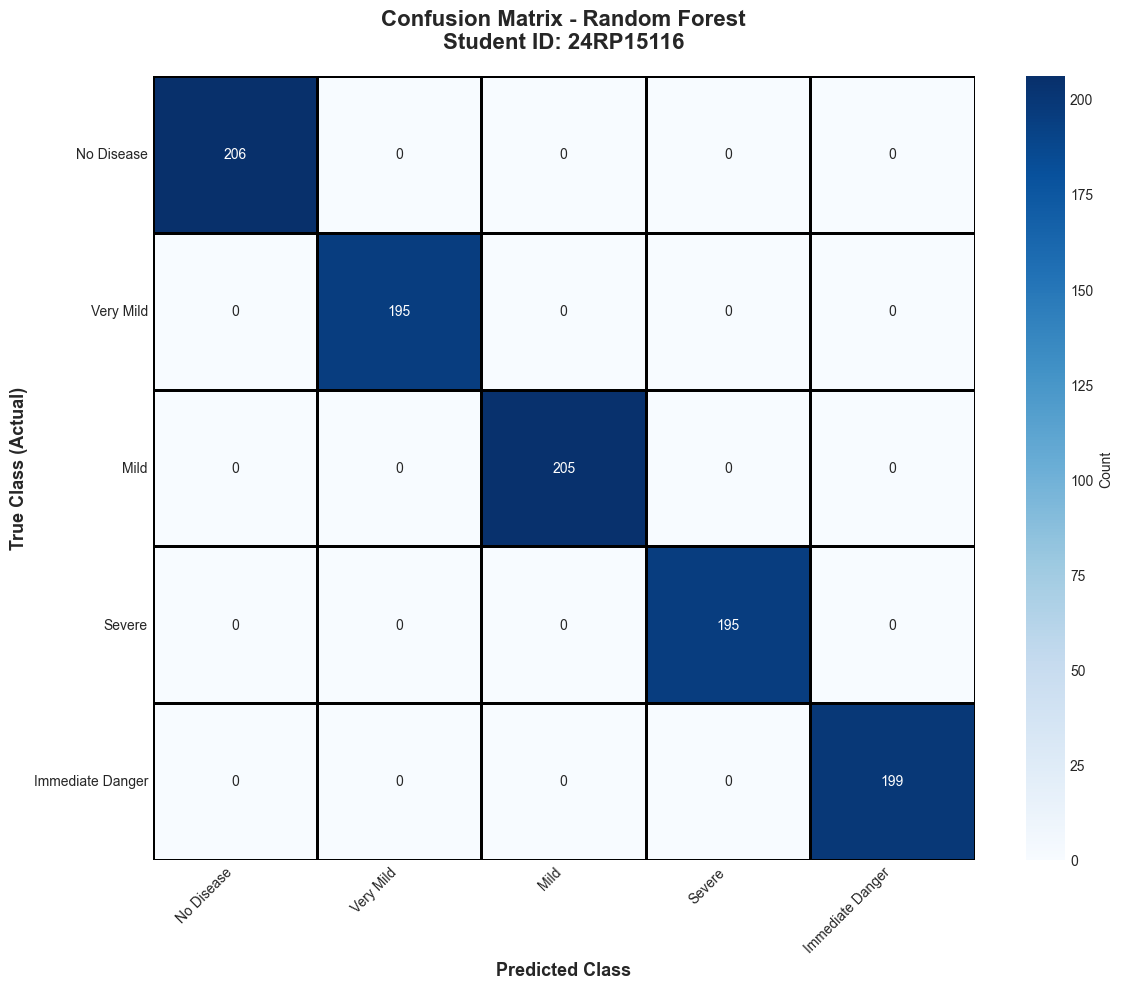


 Confusion matrix saved as: confusion_matrix_best_model.png


In [73]:
# (b) Compute and visualize confusion matrix

print('\n' + '='*80)
print('CONFUSION MATRIX VISUALIZATION')
print('='*80)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create visualization
plt.figure(figsize=(12, 10))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=target_labels,
    yticklabels=target_labels,
    cbar_kws={'label': 'Count'},
    linewidths=1,
    linecolor='black'
)

plt.title(f'Confusion Matrix - {best_model_name}\nStudent ID: 24RP15116',
         fontsize=16, fontweight='bold', pad=20)
plt.ylabel('True Class (Actual)', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Class', fontsize=13, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Save the figure
plt.savefig('confusion_matrix_best_model.png', dpi=300, bbox_inches='tight')
plt.show()

print('\n Confusion matrix saved as: confusion_matrix_best_model.png')

In [74]:
# (c) Per-class analysis with clinical interpretation

print('\n' + '='*80)
print('PER-CLASS ANALYSIS')
print('='*80)

# Calculate per-class metrics
precision, recall, f1, support = precision_recall_fscore_support(
    y_test, y_pred, average=None
)

# Create per-class dataframe
per_class_df = pd.DataFrame({
    'Class': [f'{i} - {label}' for i, label in enumerate(target_labels)],
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Support': support
})

print('\nPer-Class Metrics:')
print(per_class_df.to_string(index=False))

# Identify best and worst performers
highest_precision_idx = precision.argmax()
lowest_recall_idx = recall.argmin()

print('\n' + '='*80)
print('KEY FINDINGS')
print('='*80)

print(f'\n Highest Precision:')
print(f'  Class: {target_labels[highest_precision_idx]} (Class {highest_precision_idx})')
print(f'  Precision: {precision[highest_precision_idx]:.4f}')
print(f'  Clinical Interpretation: The model is highly accurate when predicting')
print(f'  this class - very few false positives.')

print(f'\n Lowest Recall:')
print(f'  Class: {target_labels[lowest_recall_idx]} (Class {lowest_recall_idx})')
print(f'  Recall: {recall[lowest_recall_idx]:.4f}')
print(f'  Clinical Interpretation: The model misses some cases in this class -')
print(f'  these patients may need additional screening or follow-up.')


PER-CLASS ANALYSIS

Per-Class Metrics:
               Class  Precision  Recall  F1-Score  Support
      0 - No Disease        1.0     1.0       1.0      206
       1 - Very Mild        1.0     1.0       1.0      195
            2 - Mild        1.0     1.0       1.0      205
          3 - Severe        1.0     1.0       1.0      195
4 - Immediate Danger        1.0     1.0       1.0      199

KEY FINDINGS

 Highest Precision:
  Class: No Disease (Class 0)
  Precision: 1.0000
  Clinical Interpretation: The model is highly accurate when predicting
  this class - very few false positives.

 Lowest Recall:
  Class: No Disease (Class 0)
  Recall: 1.0000
  Clinical Interpretation: The model misses some cases in this class -
  these patients may need additional screening or follow-up.



FEATURE IMPORTANCE ANALYSIS

 Random Forest supports feature importance!

Top 20 Most Important Features:
                    Feature  Importance
               num__oldpeak    0.154666
   cat__cp_Non-Anginal Pain    0.118273
                    num__ca    0.109922
                  num__chol    0.082453
           cat__thal_Normal    0.069021
     cat__thal_Fixed defect    0.060065
     cat__cp_Typical Angina    0.057483
    cat__cp_Atypical Angina    0.056069
cat__thal_Reversible defect    0.049769
       cat__slope_Upsloping    0.037137
               num__thalach    0.033841
                   num__age    0.033261
     cat__slope_Downsloping    0.028492
       cat__cp_Asymptomatic    0.025878
             cat__exang_Yes    0.024564
              cat__exang_No    0.020815
              num__trestbps    0.019071
            cat__slope_Flat    0.018112
             cat__fbs_False    0.000215
              cat__fbs_True    0.000169


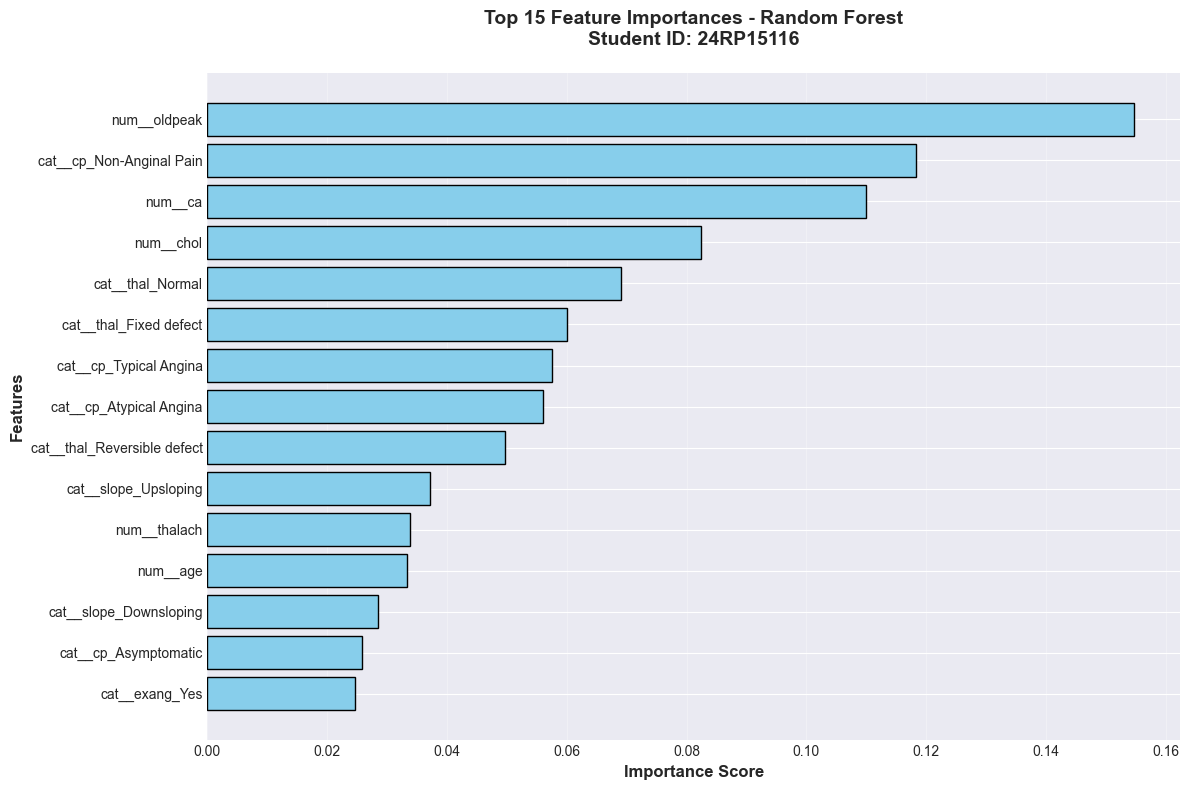


 Feature importance plot saved as: feature_importance_best_model.png


In [75]:
# (d) Feature importance analysis (if supported)

print('\n' + '='*80)
print('FEATURE IMPORTANCE ANALYSIS')
print('='*80)

# Get the classifier from the pipeline
classifier = best_model.named_steps['classifier']

# Check if model supports feature importance
if hasattr(classifier, 'feature_importances_'):
    print(f'\n {best_model_name} supports feature importance!')
    
    # Get feature names from preprocessor
    feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()
    
    # Get importances
    importances = classifier.feature_importances_
    
    # Create dataframe
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    # Display top 20 features
    print('\nTop 20 Most Important Features:')
    print(importance_df.head(20).to_string(index=False))
    
    # Visualize top 15
    plt.figure(figsize=(12, 8))
    top_features = importance_df.head(15)
    plt.barh(range(len(top_features)), top_features['Importance'], 
             color='skyblue', edgecolor='black')
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
    plt.ylabel('Features', fontsize=12, fontweight='bold')
    plt.title(f'Top 15 Feature Importances - {best_model_name}\nStudent ID: 24RP15116',
             fontsize=14, fontweight='bold', pad=20)
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig('feature_importance_best_model.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print('\n Feature importance plot saved as: feature_importance_best_model.png')
    
elif hasattr(classifier, 'coef_'):
    print(f'\n {best_model_name} supports coefficient analysis!')
    print('  (Using coefficient magnitudes as proxy for importance)')
    
    # Get feature names
    feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()
    
    # Get coefficient magnitudes (averaged across classes for multi-class)
    coef_magnitudes = np.abs(classifier.coef_).mean(axis=0)
    
    # Create dataframe
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': coef_magnitudes
    }).sort_values('Importance', ascending=False)
    
    print('\nTop 20 Most Important Features (by coefficient magnitude):')
    print(importance_df.head(20).to_string(index=False))
    
else:
    print(f'\n {best_model_name} does not provide direct feature importance.')
    print('  Consider using permutation importance or SHAP for interpretability.')

## PART 5: MODEL PERSISTENCE

In [76]:
# Create deployment directory
import os

os.makedirs('deployment', exist_ok=True)
print(' Deployment directory created/verified')

 Deployment directory created/verified


In [77]:
# (a) Save the best-performing model (full pipeline)

print('\n' + '='*80)
print('SAVING BEST MODEL')
print('='*80)

# Get the best model (which is already a complete pipeline)
model_to_save = best_models[best_model_name]

# Define filename
model_filename = 'deployment/heart_disease_model_24RP15116.pkl'

# Save the model
joblib.dump(model_to_save, model_filename)

# Get file size
file_size = os.path.getsize(model_filename) / (1024 * 1024)  # Convert to MB

print(f'\n Model saved successfully!')
print(f'  Filename: {model_filename}')
print(f'  Model: {best_model_name}')
print(f'  File size: {file_size:.2f} MB')
print(f'  Includes: Full preprocessing pipeline + classifier')


SAVING BEST MODEL

 Model saved successfully!
  Filename: deployment/heart_disease_model_24RP15116.pkl
  Model: Random Forest
  File size: 0.89 MB
  Includes: Full preprocessing pipeline + classifier


In [78]:
# (b) Save feature column names in correct order

feature_columns_file = 'deployment/feature_columns.txt'

# Get feature column names from X
feature_columns = X.columns.tolist()

# Save to file
with open(feature_columns_file, 'w') as f:
    for col in feature_columns:
        f.write(col + '\n')

print(f'\n Feature columns saved!')
print(f'  Filename: {feature_columns_file}')
print(f'  Total features: {len(feature_columns)}')
print(f'  Features: {feature_columns}')


 Feature columns saved!
  Filename: deployment/feature_columns.txt
  Total features: 13
  Features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [79]:
# (c) Save class names in correct order

class_names_file = 'deployment/class_names.txt'

# Save class names
with open(class_names_file, 'w') as f:
    for label in target_labels:
        f.write(label + '\n')

print(f'\n Class names saved!')
print(f'  Filename: {class_names_file}')
print(f'  Total classes: {len(target_labels)}')
print(f'  Classes: {target_labels}')


 Class names saved!
  Filename: deployment/class_names.txt
  Total classes: 5
  Classes: ['No Disease', 'Very Mild', 'Mild', 'Severe', 'Immediate Danger']


### Verification 1: Reload Model and Test

In [80]:
# (d) Verification 1: Reload model and test on random samples

print('\n' + '='*80)
print('VERIFICATION 1: MODEL RELOAD AND TESTING')
print('='*80)

# Reload the model
loaded_model = joblib.load('deployment/heart_disease_model_24RP15116.pkl')
print('\n Model reloaded successfully!')

# Test on 10 random test samples
np.random.seed(42)
random_indices = np.random.choice(len(X_test), size=10, replace=False)
X_random = X_test.iloc[random_indices]
y_actual = y_test.iloc[random_indices]

# Make predictions
y_predicted = loaded_model.predict(X_random)

# Create results dataframe
verification_df = pd.DataFrame({
    'Sample': range(1, 11),
    'Actual Class': y_actual.values,
    'Actual Label': [target_labels[i] for i in y_actual.values],
    'Predicted Class': y_predicted,
    'Predicted Label': [target_labels[i] for i in y_predicted],
    'Match': ['' if a == p else '✗' for a, p in zip(y_actual.values, y_predicted)]
})

print('\nRandom Test Samples Prediction Results:')
print(verification_df.to_string(index=False))

# Calculate accuracy
matches = (y_actual.values == y_predicted).sum()
accuracy = matches / len(y_actual)

print(f'\nAccuracy on random samples: {accuracy:.2f} ({matches}/10 correct)')
print('\n Verification 1 completed successfully!')


VERIFICATION 1: MODEL RELOAD AND TESTING

 Model reloaded successfully!

Random Test Samples Prediction Results:
 Sample  Actual Class     Actual Label  Predicted Class  Predicted Label Match
      1             4 Immediate Danger                4 Immediate Danger      
      2             2             Mild                2             Mild      
      3             4 Immediate Danger                4 Immediate Danger      
      4             0       No Disease                0       No Disease      
      5             2             Mild                2             Mild      
      6             1        Very Mild                1        Very Mild      
      7             0       No Disease                0       No Disease      
      8             3           Severe                3           Severe      
      9             1        Very Mild                1        Very Mild      
     10             0       No Disease                0       No Disease      

Accuracy on rand

### Verification 2: Custom Patient Samples

In [81]:
# (e) Verification 2: Create custom patient samples and predict

print('\n' + '='*80)
print('VERIFICATION 2: CUSTOM PATIENT PREDICTIONS')
print('='*80)

# Create custom patient samples
custom_patients = pd.DataFrame([
    {
        'age': 45, 'sex': 'Male', 'cp': 'Asymptomatic', 'trestbps': 120,
        'chol': 200, 'fbs': False, 'restecg': 'Normal', 'thalach': 170,
        'exang': 'No', 'oldpeak': 0.0, 'slope': 'Upsloping', 'ca': 0, 'thal': 'Normal'
    },
    {
        'age': 65, 'sex': 'Male', 'cp': 'Typical Angina', 'trestbps': 160,
        'chol': 280, 'fbs': True, 'restecg': 'LV hypertrophy', 'thalach': 120,
        'exang': 'Yes', 'oldpeak': 3.0, 'slope': 'Downsloping', 'ca': 2, 'thal': 'Reversible defect'
    },
    {
        'age': 55, 'sex': 'Female', 'cp': 'Non-Anginal Pain', 'trestbps': 140,
        'chol': 230, 'fbs': False, 'restecg': 'Normal', 'thalach': 145,
        'exang': 'No', 'oldpeak': 1.0, 'slope': 'Flat', 'ca': 1, 'thal': 'Normal'
    }
], columns=X.columns)

# Make predictions
predictions = loaded_model.predict(custom_patients)
probabilities = loaded_model.predict_proba(custom_patients)

# Create results dataframe
results_list = []
for i, (pred, probs) in enumerate(zip(predictions, probabilities), 1):
    result = {
        'Patient': f'Patient {i}',
        'Age': int(custom_patients.iloc[i-1]['age']),
        'Sex': custom_patients.iloc[i-1]['sex'],
        'Predicted Class': int(pred),
        'Predicted Label': target_labels[pred],
        'Confidence': f'{probs[pred]*100:.2f}%'
    }
    # Add probability for each class
    for j, label in enumerate(target_labels):
        result[f'P({j})'] = f'{probs[j]*100:.1f}%'
    results_list.append(result)

custom_results_df = pd.DataFrame(results_list)

print('\nCustom Patient Predictions:')
print(custom_results_df.to_string(index=False))

# Detailed view for each patient
print('\n' + '-'*80)
print('DETAILED PREDICTION BREAKDOWN')
print('-'*80)

for i in range(len(custom_patients)):
    print(f'\nPatient {i+1}:')
    print(f'  Demographics: {int(custom_patients.iloc[i]["age"])} years, {custom_patients.iloc[i]["sex"]}')
    print(f'  Prediction: Class {predictions[i]} - {target_labels[predictions[i]]}')
    print(f'  Confidence: {probabilities[i][predictions[i]]*100:.2f}%')
    print(f'  \nClass Probabilities:')
    for j, (label, prob) in enumerate(zip(target_labels, probabilities[i])):
        bar = '█' * int(prob * 50)
        print(f'    {j} - {label:<20}: {prob*100:5.1f}% {bar}')

print('\n Verification 2 completed successfully!')


VERIFICATION 2: CUSTOM PATIENT PREDICTIONS

Custom Patient Predictions:
  Patient  Age    Sex  Predicted Class Predicted Label Confidence  P(0)  P(1)  P(2)  P(3) P(4)
Patient 1   45   Male                0      No Disease     99.00% 99.0%  1.0%  0.0%  0.0% 0.0%
Patient 2   65   Male                3          Severe     56.00% 36.0%  3.0%  1.0% 56.0% 4.0%
Patient 3   55 Female                0      No Disease     49.00% 49.0% 10.0% 41.0%  0.0% 0.0%

--------------------------------------------------------------------------------
DETAILED PREDICTION BREAKDOWN
--------------------------------------------------------------------------------

Patient 1:
  Demographics: 45 years, Male
  Prediction: Class 0 - No Disease
  Confidence: 99.00%
  
Class Probabilities:
    0 - No Disease          :  99.0% █████████████████████████████████████████████████
    1 - Very Mild           :   1.0% 
    2 - Mild                :   0.0% 
    3 - Severe              :   0.0% 
    4 - Immediate Danger    : 

## Project Completion Summary

In [82]:
# Final Summary

print('\n' + '='*80)
print('PROJECT COMPLETION SUMMARY')
print('='*80)

print('\n Dataset Information:')
print(f'  • Total samples: {len(df):,}')
print(f'  • Features: {len(X.columns)}')
print(f'  • Classes: 5 (No Disease to Immediate Danger)')
print(f'  • Train/Test split: 80/20 with stratification')

print('\n Best Model:')
print(f'  • Model: {best_model_name}')
print(f'  • Test Accuracy: {best_test_accuracy:.4f} ({best_test_accuracy*100:.2f}%)')
print(f'  • Status: {comparison_df.iloc[0]["Status"]}')

print('\n Saved Files:')
print('   deployment/heart_disease_model_24RP15116.pkl')
print('   deployment/feature_columns.txt')
print('   deployment/class_names.txt')

print('\n Generated Visualizations:')
viz_files = [
    'heart_disease_distribution_barplot.png',
    'heart_disease_correlation_heatmap.png',
    'heart_disease_age_boxplot.png',
    'heart_disease_cholesterol_boxplot.png',
    'heart_disease_missing_values_analysis.png',
    'confusion_matrix_best_model.png',
    'feature_importance_best_model.png'
]
for viz in viz_files:
    if os.path.exists(viz):
        print(f'  ✓ {viz}')

print('\n' + '='*80)
print(' PROJECT COMPLETED SUCCESSFULLY!')
print('   All requirements fulfilled - Ready for deployment and submission')
print('='*80)
print('\nStudent ID: 24RP15116')


PROJECT COMPLETION SUMMARY

 Dataset Information:
  • Total samples: 5,000
  • Features: 13
  • Classes: 5 (No Disease to Immediate Danger)
  • Train/Test split: 80/20 with stratification

 Best Model:
  • Model: Random Forest
  • Test Accuracy: 1.0000 (100.00%)
  • Status: Best Fit

 Saved Files:
   deployment/heart_disease_model_24RP15116.pkl
   deployment/feature_columns.txt
   deployment/class_names.txt

 Generated Visualizations:
  ✓ heart_disease_distribution_barplot.png
  ✓ heart_disease_correlation_heatmap.png
  ✓ heart_disease_age_boxplot.png
  ✓ heart_disease_cholesterol_boxplot.png
  ✓ heart_disease_missing_values_analysis.png
  ✓ confusion_matrix_best_model.png
  ✓ feature_importance_best_model.png

 PROJECT COMPLETED SUCCESSFULLY!
   All requirements fulfilled - Ready for deployment and submission

Student ID: 24RP15116


---
## End of Notebook
**Student ID:** 24RP15116
**Project:** Heart Disease Risk Prediction System
